<a href="https://colab.research.google.com/github/Cris12Mainz/Deep-Learning/blob/main/lab_04/colab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="center" style="max-width: 1000px" src="https://github.com/HSG-AIML-Teaching/GSERM2025-Lab/blob/main/lab_04/banner.png?raw=1">

#### <img align="right" style="max-width: 200px; height: auto" src="https://github.com/HSG-AIML-Teaching/GSERM2025-Lab/blob/main/lab_04/hsg_logo.png?raw=1">

##  Lab 04 - Artificial Neural Networks

GSERM Summer School 2025, Deep Learning: Fundamentals and Applications, University of St. Gallen

The lab environment is based on Jupyter Notebooks (https://jupyter.org), which provide an interactive platform for performing a variety of statistical evaluations and data analyses. In this lab, we will learn how to implement, train, and apply our first **Artificial Neural Network (ANN)** using a Python library named `PyTorch`. The `PyTorch` library is an open-source machine learning library for Python, used for a variety of applications such as image classification and natural language processing.

Artificial Neural Networks, inspired by the human brain, have a rich history dating back to the 1940s. Key figures such as *Warren McCulloch* and *Walter Pitts*, who introduced **the first computational model for neural networks**, and *Frank Rosenblatt*, who developed the **perceptron algorithm** in the 1950s, played pivotal roles in the evolution of ANNs. These networks are designed to recognize patterns and make decisions. In this lab, we will delve into the fascinating world of neural networks and harness their power to classify images of fashion articles from the **Fashion-MNIST** dataset, a popular dataset used in machine learning for benchmarking models.

The figure below illustrates a high-level view of the machine-learning process we aim to establish in this lab:

<img align="center" style="max-width: 1000px" src="https://github.com/HSG-AIML-Teaching/GSERM2025-Lab/blob/main/lab_04/splash.png?raw=1">

As always, please don't hesitate to ask any questions during the lab, post them in our CANVAS (StudyNet) forum (https://learning.unisg.ch), or send us an email using the course email.

## 1. Lab Objectives:

After today's lab, you should be able to:

> 1. **Understand Neural Network Design:** Learn the fundamental concepts and architectural design of artificial neural networks.
> 2. **Implement and Train a Neural Network:** Gain hands-on experience with PyTorch to build and train a neural network model.
> 3. **Apply Neural Networks for Image Classification:** Use neural networks to classify images of fashion articles from the Fashion-MNIST dataset.
> 4. **Evaluate and Interpret Model Performance:** Evaluate the network's classification results using accuracy metrics and interpret the confusion matrix.


Before we start let's watch a motivational video:

In [1]:
from IPython.display import YouTubeVideo
# NVIDIA - The Deep Learning Revolution"
# YouTubeVideo('Dy0hJWltsyE', width=800, height=400)

## 2. Setup of the Jupyter Notebook Environment

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Similar to the previous labs, we need to import a few Python libraries for data analysis and visualization. We will primarily use `PyTorch`, `Numpy`, `Scikit-Learn`, `Matplotlib`, `Seaborn`, and a few utility libraries throughout this lab:

In [2]:
# import standard python libraries
import os, urllib, io
from datetime import datetime
import numpy as np

Import `Python` machine learning and deep learning libraries:

In [3]:
# import the PyTorch deep learning libary
import torch, torchvision
import torch.nn.functional as F
from torch import nn, optim

Import `Scikit-learn` classification metrics:

In [4]:
# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

Import `Matplotlib`, `Seaborn` and `PIL` data visualization libraries:

In [5]:
# import matplotlib, seaborn, and PIL data visualization libary
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

Enable inline plotting with `Matplotlib`:

In [7]:
%matplotlib inline

Import `Google's Google Drive` connector and mount your `Google Drive` directories:

In [10]:
# import the Google Colab GDrive connector
from google.colab import drive

# mount GDrive inside the Colab notebook
drive.mount('/content/drive')

Mounted at /content/drive


Create a structure of Colab Notebook sub-directories inside Google Drive to store (1) the data and (2) the trained neural network models:

In [13]:
# create Colab Notebooks directory
notebook_directory = '/content/drive/MyDrive/Colab Notebooks'
if not os.path.exists(notebook_directory): os.makedirs(notebook_directory)

 # create data sub-directory inside the Colab Notebooks directory
data_directory = '/content/drive/MyDrive/Colab Notebooks/data_fmnist'
if not os.path.exists(data_directory): os.makedirs(data_directory)

 # create models sub-directory inside the Colab Notebooks directory
models_directory = '/content/drive/MyDrive/Colab Notebooks/models_fmnist'
if not os.path.exists(models_directory): os.makedirs(models_directory)

Set a random `seed` value to obtain reproducible results:

In [14]:
# init deterministic seed
seed_value = 1234
np.random.seed(seed_value) # set numpy seed
torch.manual_seed(seed_value); # set pytorch seed CPU

Google Colab provides free GPUs for running notebooks. However, if you execute this notebook as is, it will use your device's CPU. To run the lab on a GPU, go to `Runtime` > `Change runtime type` and set the Runtime type to `GPU` in the drop-down menu. Running this lab on a CPU is fine, but you will find that GPU computing is faster. *CUDA* indicates that the lab is being run on a GPU.

Enable GPU computing by setting the device flag and initializing a CUDA seed:

In [15]:
# set cpu or gpu enabled device
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu').type

# init deterministic GPU seed
torch.mps.manual_seed(seed_value)
torch.cuda.manual_seed(seed_value)

# log type of device enabled
print('[LOG] notebook with {} computation enabled'.format(str(device)))

[LOG] notebook with cuda computation enabled


Let's determine if we have access to a GPU provided by environments such as `Google Colab`:

In [16]:
!nvidia-smi

Tue Jun 10 12:04:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 3. Dataset Download and Data Assessment

The **Fashion-MNIST database** is a large dataset of Zalando articles commonly used for training various image processing systems. The database is widely used for training and testing in the field of machine learning. Let's take a brief look at a few sample images from the dataset:

<img align="center" style="max-width: 700px; height: 300px" src="https://github.com/HSG-AIML-Teaching/GSERM2025-Lab/blob/main/lab_04/FashionMNIST.png?raw=1">

Source: https://www.kaggle.com/c/insar-fashion-mnist-challenge

Further details on the dataset can be obtained from Zalando Research's [GitHub page](https://github.com/zalandoresearch/fashion-mnist).

The **Fashion-MNIST database** is an image dataset of Zalando's article images, consisting of **70,000 images** in total. The dataset is divided into **60,000 training examples** and **10,000 evaluation examples**. Each example is a **28x28 grayscale image**, associated with a **label from 10 classes**. Zalando created this dataset to replace the popular **MNIST** handwritten digits dataset. It is a useful addition as it is a bit more complex but still very easy to use. It shares the same image size and train/test split structure as MNIST, making it a drop-in replacement. It requires minimal efforts in preprocessing and formatting the distinct images.

Let's download, transform and inspect the training images of the dataset. Therefore, let's first define the directory in which we aim to store the training data:

In [17]:
train_path = data_directory + '/train_fmnist'

Now, let's download the training data accordingly:

In [18]:
# define pytorch transformation into tensor format
transf = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

# download and transform training images
fashion_mnist_train_data = torchvision.datasets.FashionMNIST(root=train_path, train=True, transform=transf, download=True)

100%|██████████| 26.4M/26.4M [00:00<00:00, 113MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 5.98MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 60.6MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 19.2MB/s]


Verify the number of training images downloaded:

In [19]:
# determine the number of training data images
len(fashion_mnist_train_data)

60000

Next, let's inspect a few of the downloaded training images:

In [21]:
# select and set a (random) image id
image_id = 300

# retrieve image exhibiting the image id
fashion_mnist_train_data[image_id]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

Ok, that doesn't seem right. Let's now separate the image from its label information:

In [22]:
fashion_mnist_train_image, fashion_mnist_train_label = fashion_mnist_train_data[image_id]

We can verify the label of our selected image:

In [23]:
fashion_mnist_train_label

5

Ok, we know that the numerical label is 6. Each image is associated with a label from 0 to 9, representing one of the fashion items. So what does 6 mean? Is it a bag? A pullover?

The order of the classes can be found on Zalando Research's [GitHub page](https://github.com/zalandoresearch/fashion-mnist). We need to map each numerical label to its fashion item, which will be useful throughout the lab:

In [24]:
fashion_classes = {0: 'T-shirt/top',
                    1: 'Trouser',
                    2: 'Pullover',
                    3: 'Dress',
                    4: 'Coat',
                    5: 'Sandal',
                    6: 'Shirt',
                    7: 'Sneaker',
                    8: 'Bag',
                    9: 'Ankle boot'}

So, we can determine the fashion item that the label represents:

In [25]:
fashion_classes[fashion_mnist_train_label]

'Sandal'

Great, let's now visually inspect our sample image:

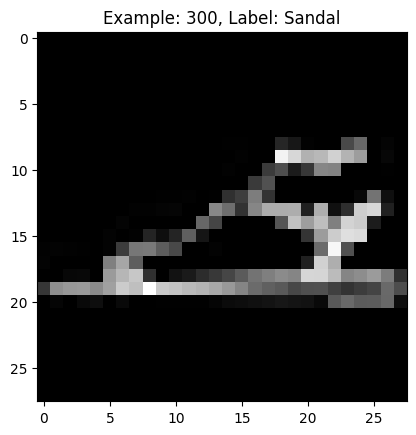

In [26]:
# define tensor to image transformation
trans = torchvision.transforms.ToPILImage()

# set image plot title
plt.title('Example: {}, Label: {}'.format(str(image_id), fashion_classes[fashion_mnist_train_label]))

# plot mnist handwritten digit sample
plt.imshow(trans(fashion_mnist_train_image), cmap='gray')

Fantastic, right? Let's now define the directory in which we aim to store the evaluation data:

In [27]:
eval_path = data_directory + '/eval_fmnist'

And download the evaluation data accordingly:

In [28]:
# define pytorch transformation into tensor format
transf = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

# download and transform training images
fashion_mnist_eval_data = torchvision.datasets.FashionMNIST(root=eval_path, train=False, transform=transf, download=True)

100%|██████████| 26.4M/26.4M [00:00<00:00, 116MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 5.46MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 62.4MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.6MB/s]


Let's also verify the number of evaluation images downloaded:

In [29]:
# determine the number of evaluation data images
len(fashion_mnist_eval_data)

10000

## 4. Neural Network Implementation

In this section, we will implement the architecture of the **neural network** we aim to utilize to learn a model capable of classifying the 28x28 pixel FashionMNIST images of fashion items. However, before we start the implementation, let's briefly revisit the process to be established. The following cartoon provides a birds-eye view:

<img align="center" style="max-width: 1000px" src="https://github.com/HSG-AIML-Teaching/GSERM2025-Lab/blob/main/lab_04/process.png?raw=1">

### 4.1 Implementation of the Neural Network Architecture

The neural network, which we name **'FashionMNISTNet'**, consists of three **fully-connected layers** (including an input layer and two hidden layers). Furthermore, the **FashionMNISTNet** should encompass the following number of neurons per layer: 100 (layer 1), 50 (layer 2), and 10 (layer 3). This means the first layer consists of 100 neurons, the second layer of 50 neurons, and the third layer of 10 neurons (corresponding to the number of digit classes we aim to classify).

We will now start implementing the network architecture as a separate Python class. Implementing the network architecture as a **separate class** in Python is good practice in deep learning projects. It will allow us to create and train several instances of the same neural network architecture. This provides us, for example, the opportunity to evaluate different initializations of the network parameters or train models using distinct datasets.

In [31]:
# implement the MNISTNet network architecture
class FashionMNISTNet(nn.Module):

    # define the class constructor
    def __init__(self):

        # call super class constructor
        super(FashionMNISTNet, self).__init__()

        # specify fully-connected (fc) layer 1 - in 28*28, out 100
        self.linear1 = nn.Linear(28*28, 100, bias=True) # the linearity W*x+b
        self.relu1 = nn.ReLU(inplace=True) # the non-linearity

        # specify fc layer 2 - in 100, out 50
        self.linear2 = nn.Linear(100, 50, bias=True) # the linearity W*x+b
        self.relu2 = nn.ReLU(inplace=True) # the non-linarity

        # specify fc layer 3 - in 50, out 10
        self.linear3 = nn.Linear(50, 10, bias=True) # the linearity W*x+b

        # add a softmax to the last layer
        self.logsoftmax = nn.LogSoftmax(dim=1) # the softmax

    # define network forward pass
    def forward(self, images):

        # reshape image pixels
        x = images.view(-1, 28*28)

        # define fc layer 1 forward pass
        x = self.relu1(self.linear1(x))

        # define fc layer 2 forward pass
        x = self.relu2(self.linear2(x))

        # define layer 3 forward pass
        x = self.logsoftmax(self.linear3(x))

        # return forward pass result
        return x

You may have noticed when reviewing the implementation above, that we applied an additional operator, referred to as **'Softmax'**, to the third layer of our neural network.

The **softmax function**, also known as the normalized exponential function, takes as input a vector of K real numbers and normalizes it into a probability distribution consisting of K probabilities.

That is, prior to applying softmax, some vector components could be negative or greater than one and might not sum to 1. However, after applying the softmax function, each component will be in the interval $(0,1)$, and the components will add up to 1, so they can be interpreted as probabilities. In general, the softmax function $\sigma: \mathbb {R} ^{K} \to \mathbb {R} ^{K}$ is defined by the formula:

<center> $\sigma (\mathbf {z} )_{i}=\ln ({e^{z_{i}} / \sum _{j=1}^{K}e^{z_{j}}})$ </center>

for $i = 1, …, K$ and ${\mathbf {z}}=(z_{1},\ldots ,z_{K})\in \mathbb {R} ^{K}$ (Source: https://en.wikipedia.org/wiki/Softmax_function ).

Let's have a look at the simplified three-class example below. The scores of the distinct predicted classes $c_i$ are computed from the forward propagation of the network. We then take the softmax and obtain the probabilities as shown:

<img align="center" style="max-width: 800px" src="https://github.com/HSG-AIML-Teaching/GSERM2025-Lab/blob/main/lab_04/softmax.png?raw=1">

The output of the softmax function describes the neural network's probability (or confidence) that a particular sample belongs to a certain class. In the first example, the neural network assigns a confidence of 0.64 that it is a `shirt`, 0.04 that it is a `trouser`, and 0.29 that it is a `dress`. The same goes for each of the samples above.

Now that we have implemented our first neural network, we are ready to instantiate a network model to be trained:

In [32]:
model = FashionMNISTNet()

Let's push the initialized `FashionMNISTNet` model to the enabled computing `device`:

In [33]:
model = model.to(device)

Let's also double-check if our model was deployed to the GPU if available:

In [34]:
!nvidia-smi

Tue Jun 10 12:35:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P0             26W /   70W |     104MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Once the model is initialized, we can visualize the model structure and review the implemented network architecture by executing the following cell:

In [35]:
# print the initialized architectures
print('[LOG] FashionMNISTNet architecture:\n\n{}\n'.format(model))

[LOG] FashionMNISTNet architecture:

FashionMNISTNet(
  (linear1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU(inplace=True)
  (linear2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU(inplace=True)
  (linear3): Linear(in_features=50, out_features=10, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
)



Does it look as intended? Brilliant! Finally, let's have a look at the number of model parameters that we aim to train in the next steps of the notebook:

In [36]:
# init the number of model parameters
num_params = 0

# iterate over the distinct parameters
for param in model.parameters():

    # collect number of parameters
    num_params += param.numel()

# print the number of model paramters
print('[LOG] Number of to be trained FashionMNISTNet model parameters: {}.'.format(num_params))

[LOG] Number of to be trained FashionMNISTNet model parameters: 84060.


Ok, our "simple" FashionMNISTNet model already encompasses an impressive **84,060 model parameters** to be trained.

### 4.2 Specification of the Neural Network Loss Function

Now that we have implemented the **FashionMNISTNet**, we are ready to train the network. However, before starting the training, we need to define an appropriate loss function. Remember, we aim to train our model to learn a set of model parameters $\theta$ that minimize the classification error between the true class $c^{i}$ of a given handwritten digit image $x^{i}$ and its predicted class $\hat{c}^{i} = f_\theta(x^{i})$ as accurately as possible.

The training objective is to learn a set of optimal model parameters $\theta^*$ that optimize $\arg\min_{\theta} \|C - f_\theta(X)\|$ over all training images in the FashionMNIST dataset. To achieve this optimization objective, we typically minimize a loss function $\mathcal{L_{\theta}}$ as part of the network training. In this lab, we use the **'Negative Log Likelihood (NLL)'** loss, defined by:

<center> $\mathcal{L}^{NLL}_{\theta} (c_i, \hat c_i) = - \frac{1}{N} \sum_{i=1}^N \log (\hat{c}_i) $, </center>

for a set of $n$-FashionMNIST images $x^{i}$, $i=1,...,n$ and their respective predicted class labels $\hat{c}^{i}$. This is summed for all the correct classes.

Let's have a look at a brief example:

<img align="center" style="max-width: 900px" src="https://github.com/HSG-AIML-Teaching/GSERM2025-Lab/blob/main/lab_04/loss.png?raw=1">

During training, the **NLL** loss will penalize models that result in a high classification error between the predicted class labels $\hat{c}^{i}$ and their respective true class label $c^{i}$. Fortunately, implementing the NLL loss is already available in `PyTorch`! It can be instantiated "off-the-shelf" with the following `PyTorch` command:

In [37]:
# define the optimization criterion / loss function
nll_loss = nn.NLLLoss()

Let's also push the initialized `nll_loss` computation to the enabled computing `device`:

In [38]:
nll_loss = nll_loss.to(device)

## 5. Neural Network Model Training

In this section, we will train our neural network model (as implemented in the section above) using the transformed images of fashion items. More specifically, we will examine the distinct training steps and how to monitor the training progress.

### 5.1. Preparing the Network Training

So far, we have pre-processed the dataset, implemented the ANN and defined the classification error. Let's now start to train a corresponding model for **20 epochs** and a **mini-batch size of 128** FashionMNIST images per batch. This implies that the whole dataset will be fed to the ANN 20 times in chunks of 128 images yielding to **469 mini-batches** (60.000 images / 128 images per mini-batch) per epoch.

In [39]:
# specify the training parameters
num_epochs = 20 # number of training epochs
mini_batch_size = 128 # size of the mini-batches

Based on the loss magnitude of a certain mini-batch, PyTorch automatically computes the gradients. Moreover, the library also assists in optimizing and updating the network parameters $ theta$ based on the gradient.

We will use **Stochastic Gradient Descent (SGD) optimization** and set the learning rate $l = 0.001$. With each mini-batch step, the optimizer will update the model parameters $\theta$ values according to the degree of classification error (the MSE loss).

In [40]:
# define learning rate and optimization strategy
learning_rate = 0.001
optimizer = optim.SGD(params=model.parameters(), lr=learning_rate)

Now that we have successfully implemented and defined the three ANN building blocks, let's review the `FashionMNISTNet` model definition and the `loss`. Please read the above code and comments carefully, and don't hesitate to ask any questions you might have.

Additionally, let's specify and instantiate a corresponding PyTorch data loader that feeds the image tensors to our neural network:

In [41]:
fashion_mnist_train_dataloader = torch.utils.data.DataLoader(fashion_mnist_train_data, batch_size=mini_batch_size, shuffle=True)

### 5.2. Running the Network Training

Finally, we start training the model. The detailed training procedure for each mini-batch is as follows:

>1. Do a forward pass through the FashionMNISTNet network,
>2. Compute the negative log likelihood classification error $\mathcal{L}^{NLL}_{\theta}(c^{i};\hat{c}^{i})$,
>3. Do a backward pass through the FashionMNISTNet network, and
>4. Update the parameters of the network $f_\theta(\cdot)$.

We will monitor whether the loss decreases as training progresses to ensure learning while training our ANN model. Therefore, we will evaluate the classification performance of our model on a small set of test images after every epoch.

The following elements of the network training code below should be given particular attention:

>- `loss.backward()` computes the gradients based on the magnitude of the reconstruction loss,
>- `optimizer.step()` updates the network parameters based on the gradient.

In [42]:
# init collection of training epoch losses
train_epoch_losses = []

# set the model in training mode
model.train()

# train the MNISTNet model
for epoch in range(num_epochs):

    # init collection of mini-batch losses
    train_mini_batch_losses = []

    # iterate over all-mini batches
    for i, (images, labels) in enumerate(fashion_mnist_train_dataloader):

        # push mini-batch data to computation device
        images = images.to(device)
        labels = labels.to(device)

        # run forward pass through the network
        output = model(images)

        # reset graph gradients
        model.zero_grad()

        # determine classification loss
        loss = nll_loss(output, labels)

        # run backward pass
        loss.backward()

        # update network paramaters
        optimizer.step()

        # collect mini-batch reconstruction loss
        train_mini_batch_losses.append(loss.data.item())

    # determine mean min-batch loss of epoch
    train_epoch_loss = np.mean(train_mini_batch_losses)

    # print epoch loss
    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] epoch: {} train-loss: {}'.format(str(now), str(epoch), str(train_epoch_loss)))

    # set filename of actual model
    model_name = 'fashion_mnist_model_epoch_{}.pth'.format(str(epoch))

    # save current model to GDrive models directory
    torch.save(model.state_dict(), os.path.join(models_directory, model_name))

    # determine mean min-batch loss of epoch
    train_epoch_losses.append(train_epoch_loss)

[LOG 20250610-12:43:37] epoch: 0 train-loss: 2.2857209070404965
[LOG 20250610-12:43:44] epoch: 1 train-loss: 2.2358492523876587
[LOG 20250610-12:43:50] epoch: 2 train-loss: 2.17368136285973
[LOG 20250610-12:43:56] epoch: 3 train-loss: 2.0877645607950335
[LOG 20250610-12:44:02] epoch: 4 train-loss: 1.971295157475258
[LOG 20250610-12:44:08] epoch: 5 train-loss: 1.8303057669576552
[LOG 20250610-12:44:15] epoch: 6 train-loss: 1.6802565746470046
[LOG 20250610-12:44:21] epoch: 7 train-loss: 1.535277040528336
[LOG 20250610-12:44:27] epoch: 8 train-loss: 1.4042669100039549
[LOG 20250610-12:44:33] epoch: 9 train-loss: 1.2910623280986795
[LOG 20250610-12:44:40] epoch: 10 train-loss: 1.1974851154823547
[LOG 20250610-12:44:45] epoch: 11 train-loss: 1.1212393703745371
[LOG 20250610-12:44:52] epoch: 12 train-loss: 1.059409521536024
[LOG 20250610-12:44:58] epoch: 13 train-loss: 1.0090275222558711
[LOG 20250610-12:45:04] epoch: 14 train-loss: 0.967545359373601
[LOG 20250610-12:45:10] epoch: 15 train-l

Upon successful training, let's visualize and inspect the  training loss observable per epoch:

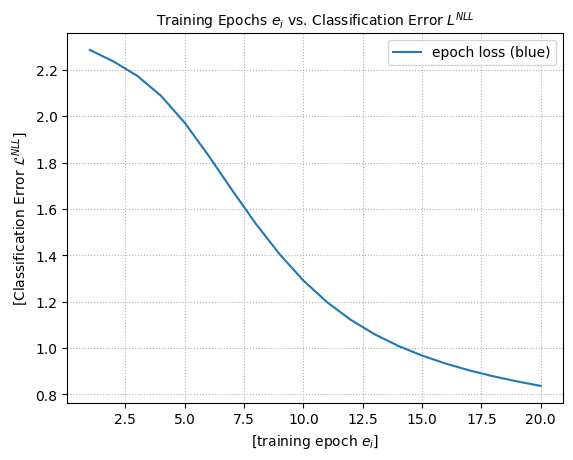

In [43]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# add grid
ax.grid(linestyle='dotted')

# plot the training epochs vs. the epochs' classification error
ax.plot(np.array(range(1, len(train_epoch_losses)+1)), train_epoch_losses, label='epoch loss (blue)')

# add axis legends
ax.set_xlabel("[training epoch $e_i$]", fontsize=10)
ax.set_ylabel("[Classification Error $\mathcal{L}^{NLL}$]", fontsize=10)

# set plot legend
plt.legend(loc="upper right", numpoints=1, fancybox=True)

# add plot title
plt.title('Training Epochs $e_i$ vs. Classification Error $L^{NLL}$', fontsize=10);

Ok, fantastic. The training error is nicely going down. We could train the network a couple more epochs until the error converges. But let's stay with the 20 training epochs for now and continue with evaluating our trained model.

## 6. Neural Network Model Evaluation

Before evaluating our model, let's load the best performing model. Remember that we stored a snapshot of the model after each training epoch in our local model directory. We will now load the last snapshot saved.

In [44]:
# restore pre-trained model snapshot
best_model_name = 'https://raw.githubusercontent.com/HSG-AIML-Teaching/GSERM2025-Lab/master/lab_04/models_fmnist/fashion_mnist_model_epoch_19.pth'

# read stored model from the remote location
model_bytes = urllib.request.urlopen(best_model_name)

# load model tensor from io.BytesIO object
model_buffer = io.BytesIO(model_bytes.read())

# init pre-trained model class
best_model = FashionMNISTNet()

# load pre-trained models
best_model.load_state_dict(torch.load(model_buffer, map_location=torch.device('cpu')))

<All keys matched successfully>

Let's inspect if the model was loaded successfully:

In [45]:
# set model in evaluation mode
best_model.eval()

FashionMNISTNet(
  (linear1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU(inplace=True)
  (linear2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU(inplace=True)
  (linear3): Linear(in_features=50, out_features=10, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
)

To evaluate our trained model, we need to feed the FashionMNIST images reserved for evaluation (the images that we didn't use as part of the training process) through the model. Therefore, let's again define a corresponding PyTorch data loader that feeds the image tensors to our neural network.

In [46]:
fashion_mnist_eval_dataloader = torch.utils.data.DataLoader(fashion_mnist_eval_data, batch_size=10000, shuffle=True)

We will now evaluate the trained model using the same mini-batch approach as we did during network training and derive the mean negative log-likelihood loss of the mini-batches.

In [47]:
# init collection of mini-batch losses
eval_mini_batch_losses = []

# iterate over all-mini batches
for i, (images, labels) in enumerate(fashion_mnist_eval_dataloader):

    # run forward pass through the network
    output = best_model(images)

    # determine classification loss
    loss = nll_loss(output, labels)

    # collect mini-batch reconstruction loss
    eval_mini_batch_losses.append(loss.data.item())

# determine mean min-batch loss of epoch
eval_loss = np.mean(eval_mini_batch_losses)

# print epoch loss
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] eval-loss: {}'.format(str(now), str(eval_loss)))

[LOG 20250610-12:56:33] eval-loss: 0.8305234313011169


understandGreat, the evaluation loss aligns with our training loss. Let's inspect a few sample predictions to get an impression of the model's quality. We will pick a random image from our evaluation dataset and retrieve its `PyTorch` tensor and the corresponding label.

In [48]:
# set (random) image id
image_id = 2000

# retrieve image exhibiting the image id
fashion_mnist_eval_image, fashion_mnist_eval_label = fashion_mnist_eval_data[image_id]

Let's now inspect the true class of the selected image:

In [49]:
fashion_classes[fashion_mnist_eval_label]

'Bag'

The randomly selected image should contain a bag. Let's inspect the image accordingly:

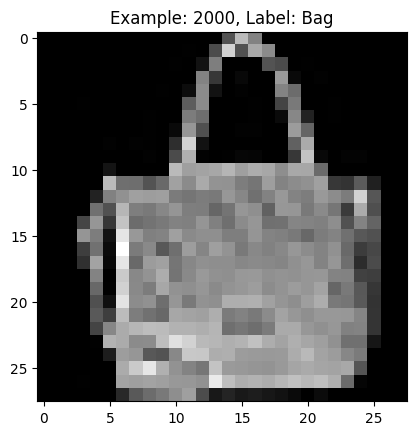

In [50]:
# define tensor to image transformation
trans = torchvision.transforms.ToPILImage()

# set image plot title
plt.title('Example: {}, Label: {}'.format(str(image_id), fashion_classes[fashion_mnist_eval_label]))

# plot mnist handwritten digit sample
plt.imshow(trans(fashion_mnist_eval_image), cmap='gray')

Let's compare the true label with our model's prediction:

In [51]:
best_model(fashion_mnist_eval_image)

tensor([[-5.2027, -8.2974, -3.5389, -4.5427, -2.8938, -3.0278, -3.0710, -5.1787,
         -0.2626, -3.5166]], grad_fn=<LogSoftmaxBackward0>)

We can even determine the likelihood of the most probable class:

In [52]:
most_probable = torch.argmax(best_model(fashion_mnist_eval_image), dim=1).item()
print('Most probable class: {}'.format(most_probable))
print('This class represents the following fashion article: {}'.format(fashion_classes[most_probable]))

Most probable class: 8
This class represents the following fashion article: Bag


Let's now obtain the predictions for all the fashion item images in the evaluation data:

In [53]:
predictions = torch.argmax(best_model(fashion_mnist_eval_data.data.float()), dim=1)

Furthermore, let's calculate the overall classification accuracy:

In [54]:
metrics.accuracy_score(fashion_mnist_eval_data.targets, predictions.detach())

0.6652

Let's also inspect the **confusion matrix** to identify major sources of misclassification:

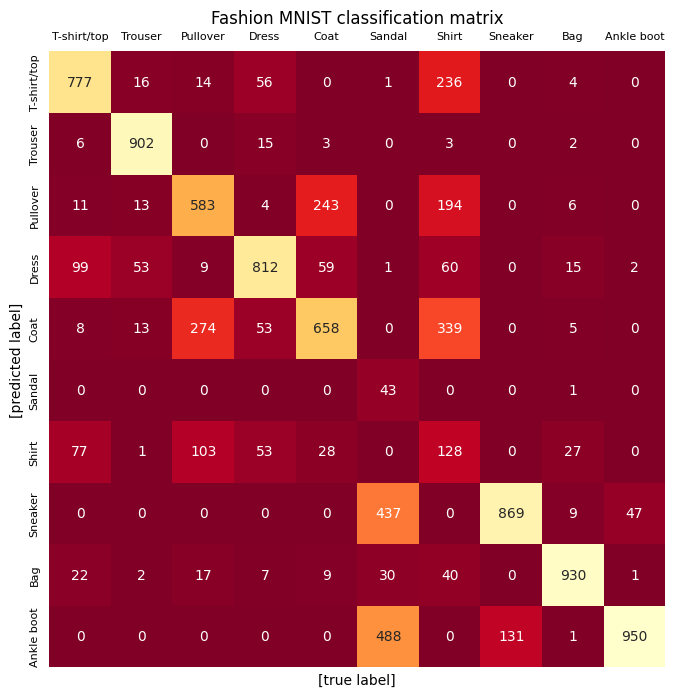

In [55]:
# determine classification matrix of the predicted and target classes
mat = confusion_matrix(fashion_mnist_eval_data.targets, predictions.detach())

# initialize the plot and define size
plt.figure(figsize=(8, 8))

# plot corresponding confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=fashion_classes.values(), yticklabels=fashion_classes.values())
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# set plot title
plt.title('Fashion MNIST classification matrix')

# set axis labels
plt.xlabel('[true label]')
plt.ylabel('[predicted label]');

Our current model **confuses sandals** with either **sneakers** or **ankle boots**. However, the inverse does not hold. The model sometimes confuses sneakers with ankle boots and rarely with sandals. The same holds for ankle boots. Our model also has issues distinguishing shirts from coats (and, to a lesser degree, from T-shirts and pullovers). These mistakes may not be surprising, as these items exhibit high similarity.

## 7. Lab Summary:

In this lab, you successfully accomplished the following key learnings:

> 1. **Understanding Neural Network Design:** Mastered artificial neural networks' fundamental concepts and architectural design, enhancing your comprehension of deep learning models.
> 2. **Model Implementation and Training:** Developed practical skills in implementing and training a neural network model using PyTorch, applying it to the Fashion-MNIST dataset to predict class labels.
> 3. **Evaluating Model Performance:** Gained expertise in evaluating the performance of neural network models through metrics such as loss and accuracy, and through the construction and analysis of confusion matrices.

This lab provided insights into designing, implementing, training, and evaluating neural networks for image classification. It equipped you with essential tools and techniques for effective model building, evaluation, and application. These skills are invaluable for succeeding in deep learning.